In [1]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots I will create


#Read in the data
df = pd.read_csv(r'C:\Users\josep\OneDrive\Portfolio DA\06_Python\movies.csv')


In [2]:
#Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [6]:
df['budget'] = df['budget'].astype('Int64')

df['gross'] = df['gross'].astype('Int64')

In [7]:
# Remove rows with missing values

df = df.dropna(axis=0, subset=['budget','gross','votes'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5436 non-null   object 
 1   rating    5424 non-null   object 
 2   genre     5436 non-null   object 
 3   year      5436 non-null   int64  
 4   released  5436 non-null   object 
 5   score     5436 non-null   float64
 6   votes     5436 non-null   float64
 7   director  5436 non-null   object 
 8   writer    5436 non-null   object 
 9   star      5436 non-null   object 
 10  country   5435 non-null   object 
 11  budget    5436 non-null   Int64  
 12  gross     5436 non-null   Int64  
 13  company   5434 non-null   object 
 14  runtime   5435 non-null   float64
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 690.1+ KB


In [8]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [9]:
# Remove duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0
2417,Madadayo,NaN,Drama,1993,"April 17, 1993",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


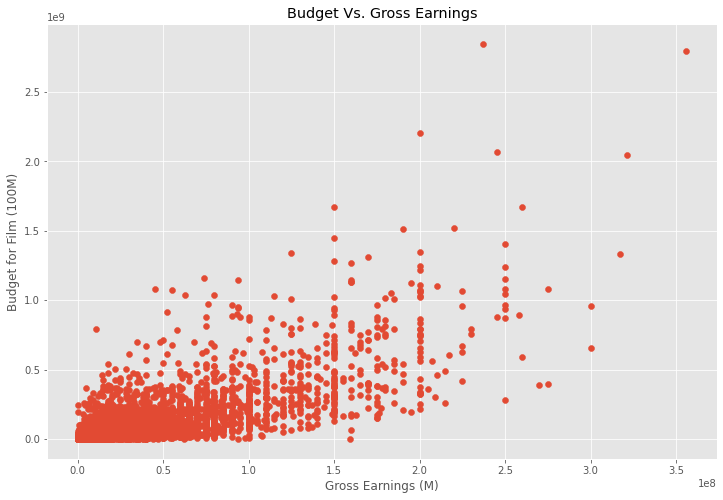

In [10]:
# Scatter Plot w/ Budget Vs. Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget Vs. Gross Earnings')
plt.xlabel('Gross Earnings (M)')
plt.ylabel('Budget for Film (100M)')
plt.show()

In [11]:
# Looking at correlation
df.corr(method='pearson') #pearson (default), kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000


In [12]:
# High correlation between budget and gross

NameError: name 'plt_show' is not defined

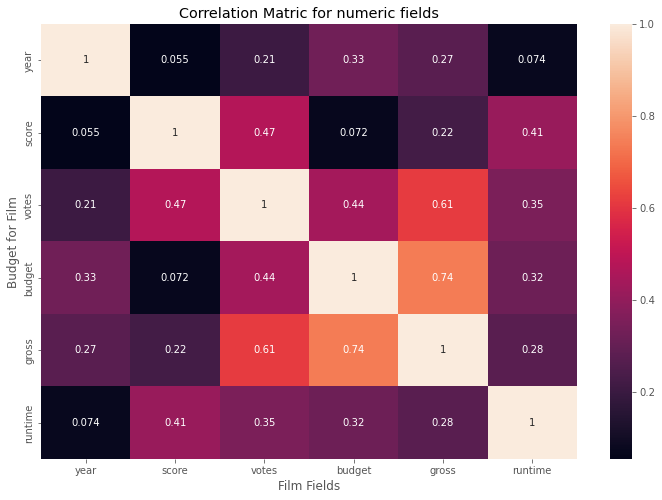

In [13]:
# Comparing correlation between numeric fields
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric fields')
plt.xlabel('Film Fields')
plt.ylabel('Budget for Film')

plt_show()

In [14]:
# Looking at correlation between companys (not numeric field)

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,387,5,0,2009,497,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0
7445,389,5,0,2019,125,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0
3045,4923,5,6,1997,503,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0
6663,3656,5,0,2015,499,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0
7244,390,5,0,2018,133,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,2981,5,0,1993,1389,4.5,1900.0,1810,3112,187,47,5000000,2970,1382,97.0
3681,1599,3,6,2000,1631,6.8,43000.0,954,1687,528,6,5000000,2554,468,108.0
272,2921,6,9,1982,1446,3.9,2300.0,263,55,1477,47,800000,2270,584,85.0
2417,2401,-1,6,1993,58,7.3,5100.0,23,1220,1687,26,11900000,596,492,134.0


NameError: name 'plt_show' is not defined

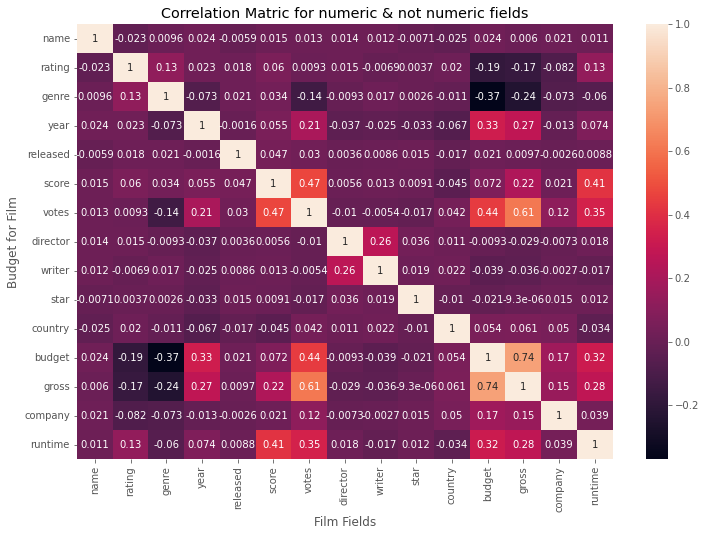

In [15]:
# Comparing correlation between numeric & not numeric fields

correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for numeric & not numeric fields')
plt.xlabel('Film Fields')
plt.ylabel('Budget for Film')

plt_show()

In [19]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.023013,0.009617,0.024435,-0.005886,0.014955,0.012915,0.013699,0.011602,-0.007109,-0.024555,0.023698,0.005966,0.021209,0.010800
rating,-0.023013,1.000000,0.128102,0.022668,0.018137,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239
genre,0.009617,0.128102,1.000000,-0.073026,0.020948,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186
year,0.024435,0.022668,-0.073026,1.000000,-0.001639,0.055174,0.205758,-0.036936,-0.024568,-0.032770,-0.066662,0.327781,0.274264,-0.013062,0.074203
released,-0.005886,0.018137,0.020948,-0.001639,1.000000,0.046732,0.029761,0.003611,0.008620,0.015233,-0.017069,0.021042,0.009715,-0.002613,0.008807
score,0.014955,0.059550,0.034061,0.055174,0.046732,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580
votes,0.012915,0.009255,-0.136457,0.205758,0.029761,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437
director,0.013699,0.014847,-0.009303,-0.036936,0.003611,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082
writer,0.011602,-0.006923,0.017500,-0.024568,0.008620,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672
star,-0.007109,0.003737,0.002619,-0.032770,0.015233,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439


In [20]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.023013
         genre       0.009617
         year        0.024435
         released   -0.005886
                       ...   
runtime  country    -0.033554
         budget      0.318595
         gross       0.275596
         company     0.038752
         runtime     1.000000
Length: 225, dtype: float64

In [21]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.368900
budget   genre     -0.368900
genre    gross     -0.244380
gross    genre     -0.244380
rating   budget    -0.186892
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [22]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross     votes       0.614904
votes     gross       0.614904
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [23]:
# Votes and budgget have the highest correlation to gross earnings
# Company has low correlation